In [1]:
import tonic.datasets as datasets
# Train and test dataset definition
from snn_delays.config import DATASET_PATH
import tonic.transforms as transforms
import numpy as np
total_time = 100
sample_transform = transforms.ToFrame(
                sensor_size= datasets.DVSGesture.sensor_size, n_time_bins=total_time)

label_transform = transforms.ToOneHotEncoding(n_classes=11)

test_dataset = datasets.DVSGesture(
    save_to=DATASET_PATH,
    train=False,
    transform=sample_transform,
    target_transform=label_transform)


In [2]:
print(len(test_dataset.data))
print(test_dataset.data[:10])
print(test_dataset.targets[:10])


264
['E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/0.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/1.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/10.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/2.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/3.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/4.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/5.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/6.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/7.npy', 'E:\\SNN_DATASETS\\Datasets\\DVSGesture\\ibmGestureTest\\user24_fluorescent/8.npy']
[0, 1, 10, 2, 3, 4, 5, 6, 7, 8]


In [3]:
a, b = test_dataset.__getitem__(0)

<class 'numpy.ndarray'>
(87787,)
[( 43,  58,  True,       0) ( 53, 107,  True,      15)
 ( 53, 107,  True,      15) ... ( 44, 109, False, 4568789)
 ( 55, 108, False, 4568813) (125,   8,  True, 4568973)]
0


In [6]:
import dv_processing as dv

# Open a file
reader = dv.io.MonoCameraRecording(r"E:\SNN_DATASETS\Datasets\davis_dummy\some_category\sample_0000.aedat4")

# Get and print the camera name that data from recorded from
# Run the loop while camera is still connected

events_packets = []

while reader.isRunning():
    # Read batch of events
    events = reader.getNextEventBatch()
    # Show other available functions of reader
    
    if events is not None:
        # Print received packet time range
        events_packets.append(events.numpy())

print(len(events_packets))
events_packets = np.concatenate(events_packets)

101


In [7]:
events_packets

array([(1747819441808388, 198,  71, 1), (1747819441808586,  83, 169, 1),
       (1747819441809470, 208, 168, 1), ...,
       (1747819442817733, 140,  63, 1), (1747819442817792, 204,   6, 0),
       (1747819442817793, 211,  23, 1)],
      dtype={'names':['timestamp','x','y','polarity'], 'formats':['<i8','<i2','<i2','i1'], 'offsets':[0,8,10,12], 'itemsize':16})

In [10]:
events_packets[0]

(1747819441808388, 198, 71, 1)

In [6]:
# Extract fields and convert
x = events_packets['x']
y = events_packets['y']
p = events_packets['polarity'].astype(bool)  # Convert to bool
t = events_packets['timestamp']

In [7]:
tonic_dtype = np.dtype([("x", np.int16), ("y", np.int16), ("p", bool), ("t", np.int64)])

In [8]:
converted_array = np.empty(len(events_packets), dtype=tonic_dtype)
converted_array["x"] = x
converted_array["y"] = y
converted_array["p"] = p
converted_array["t"] = t

# Verify
print(converted_array[:5])  # Check first 5 entries

[(198,  71,  True, 1747819441808388) ( 83, 169,  True, 1747819441808586)
 (208, 168,  True, 1747819441809470) (172,  63,  True, 1747819441809703)
 ( 81, 176,  True, 1747819441809928)]


checking for davis

In [5]:
from snn_delays.datasets.davis240c import DAVIS240C
import matplotlib.pyplot as plt
# Train and test dataset definition
from snn_delays.config import DATASET_PATH
import tonic.transforms as transforms
import numpy as np
total_time = 10
sample_transform = transforms.ToFrame(
                sensor_size= DAVIS240C.sensor_size, n_time_bins=total_time)

label_transform = transforms.ToOneHotEncoding(n_classes=11)

location = r'C:\Users\Alberto\Python\SNNDelays\davis_dummy'

test_dataset = DAVIS240C(
    save_to='',
    parent_dir=location,
    transform=sample_transform,
    target_transform=label_transform)

# events, target = test_dataset.__getitem__(0)
# print(events.shape)

In [6]:
print(len(test_dataset))
print(test_dataset.target)
test_dataset.data


19
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


['C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0000.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0001.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0002.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0003.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0004.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0005.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0006.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0007.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\another_category\\sample_0008.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\some_category\\sample_0000.aedat4',
 'C:\\Users\\Alberto\\Python\\SNNDelays\\davis_dummy\\some_category\\samp

In [7]:
test_dataset.__getitem__(0)

(array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 1, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 1, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0

In [ ]:
events, target = test_dataset.__getitem__(0)

plt.imshow(events[5, 0, :, :])

In [4]:
max(events[50, 0, :, :])

NameError: name 'events' is not defined

Final implementation

In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 50
batch_size = 64
folder_name = 'ABCXO'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  sensor_size_to = 45,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(180, 180)), Downsample(time_factor=1, spatial_factor=0.25, sensor_size=None, target_size=None), ToFrame(sensor_size=(45, 45, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


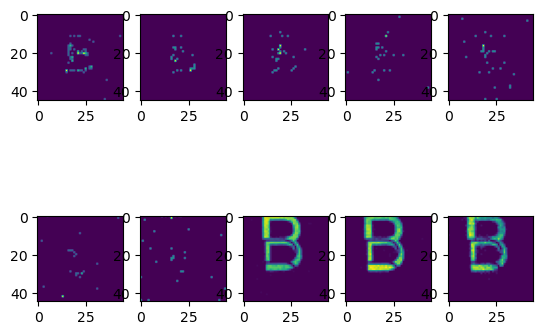

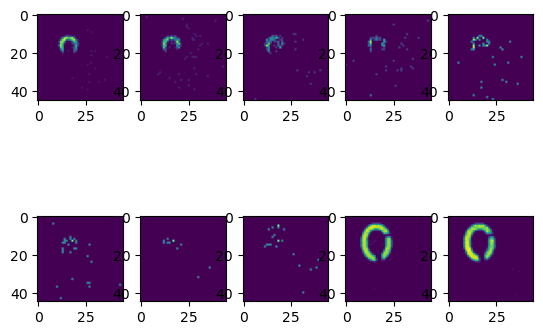

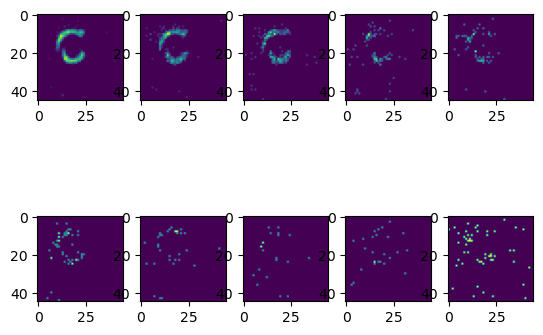

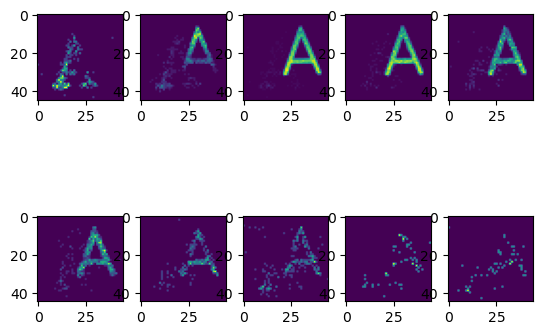

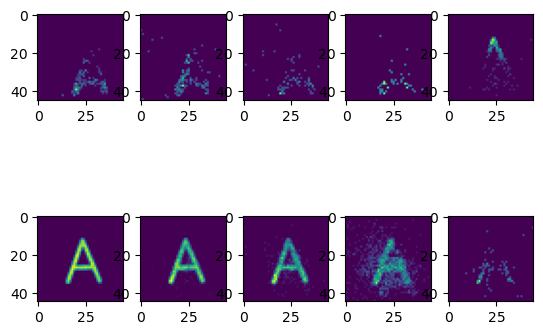

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]], dtype=torch.float64)


In [2]:
import matplotlib.pyplot as plt
for img, l in test_loader:
    for b in range(5): # 2 elements of the same batch
        for x in range(10):
            plt.subplot(2, 5, x+1)
            plt.imshow(img[b, x, 0, :, :].cpu().numpy())
        plt.show()
    print(l[:5])
    break

In [5]:
import torch
torch.sigmoid(torch.tensor(3.0))

tensor(0.9526)